In [5]:
import pandas as pd
import numpy as np
import pickle

In [3]:
ticker = 'TSLA'

In [87]:
# articles = pd.read_csv(f'./data/{ticker}_art_df.csv',index_col='date')
dbfile = open('articlePickle3', 'rb')      
articles = pickle.load(dbfile) 
dbfile.close() 

In [88]:
stocks = pd.read_csv(f'./data/{ticker}_history.csv',index_col='Date')

In [89]:
stocks = stocks.pct_change()


In [90]:
stocks[['dividends','stock splits']] = stocks[['dividends','stock splits']].fillna(0)

In [91]:
stocks.dropna(inplace=True)

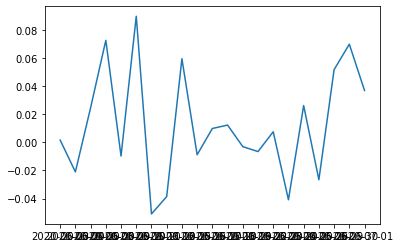

In [92]:
plt.plot(stocks['close']);

In [93]:
# create target columns with prices going up as 1 and down as 0
stocks['target'] = (stocks['close'] >= 0).astype(int)


In [94]:
articles.drop(['href','name'], axis=1, inplace=True)

KeyError: "['href'] not found in axis"

In [100]:
df = pd.merge(stocks, articles, left_index=True, right_index=True, how='outer')


In [101]:
df.tail()

,open,high,low,close,volume,dividends,stock splits,target,name,article,comments,comments_qty
2020-06-26,0.042451,0.009148,0.018908,-0.026613,-0.043179,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[-0.1537897, 0.08553932, 0.026596796, 0.140951...","[-0.15305372, 0.10253333, 0.011405529, 0.12647...","[-0.13690521, 0.08726364, 0.00089071837, 0.130...",92.0
2020-06-29,-0.025905,0.015075,-0.006650,0.051691,0.019368,0.0,0.0,1.0,NaN,NaN,NaN,NaN
2020-06-30,0.038689,0.076921,0.058206,0.069807,0.870247,0.0,0.0,1.0,"[-0.31224275, 0.18254796, 0.046743482, 0.24513...","[-0.30316764, 0.19107822, 0.0032325853, 0.2572...","[-0.23649916, 0.1898439, 0.0055781216, 0.23408...",370.0
2020-07-01,0.076006,0.043799,0.076485,0.036877,-0.210567,0.0,0.0,1.0,NaN,NaN,NaN,NaN


In [102]:
df.ffill(inplace=True)


In [105]:
df.head()

,open,high,low,close,volume,dividends,stock splits,target,name,article,comments,comments_qty
2020-06-03,-0.007354,-0.011798,0.010448,0.001588,-0.413996,0.0,0.0,1.0,NaN,NaN,NaN,NaN
2020-06-04,0.001982,-0.002439,-0.024611,-0.021043,0.118020,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-06-05,-0.013530,-0.010304,0.009040,0.024619,-0.121044,0.0,0.0,1.0,NaN,NaN,NaN,NaN
2020-06-08,0.046888,0.071606,0.049596,0.072556,0.814501,0.0,0.0,1.0,NaN,NaN,NaN,NaN
2020-06-09,0.022862,0.004674,0.016246,-0.009738,-0.196583,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2020-06-03 to 2020-07-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          22 non-null     float64
 1   high          22 non-null     float64
 2   low           22 non-null     float64
 3   close         22 non-null     float64
 4   volume        22 non-null     float64
 5   dividends     22 non-null     float64
 6   stock splits  22 non-null     float64
 7   target        22 non-null     float64
 8   name          12 non-null     object 
 9   article       12 non-null     object 
 10  comments      12 non-null     object 
 11  comments_qty  12 non-null     float64
dtypes: float64(9), object(3)
memory usage: 2.2+ KB


## Modeling


RNN

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
X = df.drop(columns='target')
y = df['target']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [99]:
X_train

,open,high,low,close,volume,dividends,stock splits,name,article,comments,comments_qty
2020-06-03,-0.007354,-0.011798,0.010448,0.001588,-0.413996,0.0,0.0,NaN,NaN,NaN,NaN
2020-06-04,0.001982,-0.002439,-0.024611,-0.021043,0.118020,0.0,0.0,NaN,NaN,NaN,NaN
2020-06-05,-0.013530,-0.010304,0.009040,0.024619,-0.121044,0.0,0.0,NaN,NaN,NaN,NaN
2020-06-08,0.046888,0.071606,0.049596,0.072556,0.814501,0.0,0.0,NaN,NaN,NaN,NaN
2020-06-09,0.022862,0.004674,0.016246,-0.009738,-0.196583,0.0,0.0,NaN,NaN,NaN,NaN
2020-06-10,0.055180,0.076527,0.063392,0.089702,0.630056,0.0,0.0,NaN,NaN,NaN,NaN
2020-06-11,-0.001694,-0.008292,-0.010687,-0.050934,-0.142587,0.0,0.0,NaN,NaN,NaN,NaN
2020-06-12,-0.010301,-0.030404,-0.061111,-0.038609,0.051123,0.0,0.0,NaN,NaN,NaN,NaN
2020-06-15,-0.063480,0.010992,-0.004493,0.059469,-0.061745,0.0,0.0,NaN,NaN,NaN,NaN
2020-06-16,0.102485,0.014056,0.059318,-0.008851,-0.104866,0.0,0.0,NaN,NaN,NaN,NaN


In [85]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

ValueError: setting an array element with a sequence.